In [1]:
import os
from dataset_maker import create_augmented_images
import albumentations as A
import time

NEWDIR = "/Users/thang/Documents/Thang/yolodata"
OLDDIR = "/Users/thang/Documents/Thang/data_preprocessing/segmentation_masks/dataset2/yolov5_dataset"
MASKDIR = '/Users/thang/Documents/Thang/data_preprocessing/segmentation_masks/SegmentationObject'
DATA_INFO = '/Users/thang/Documents/Thang/data_preprocessing/segmentation_masks//manual_annotated_data.csv'

In [2]:
Flip = A.Flip(p=1.0)

In [3]:
create_augmented_images(augmentation = Flip, olddir = OLDDIR, newdir = NEWDIR, maskdir = MASKDIR, data_info_path = DATA_INFO, is_normalize = True)

100%|██████████| 538/538 [00:15<00:00, 34.70it/s]


In [6]:
import albumentations as A
import pathlib
from skimage.measure import regionprops, regionprops_table,find_contours
from skimage.measure import label as skinmage_label
from skimage.io import imread
import shutil
import pandas as pd
from sklearn import preprocessing
import numpy as np
import cv2
from tqdm import tqdm

img = imread("/Users/thang/Documents/Thang/yolodata/images/test/567021.jpg")

In [28]:
def get_label(data_info, name):
    return data_info[data_info.file == name].name.iloc[0]
    
def get_mask_path(image_name, maskdir):
    pic_png = image_name + '.png'
    mask_path = pathlib.Path(maskdir, pic_png)
    return mask_path

def get_bbox(mask): 
    output = set()
    for prop in regionprops(skinmage_label(mask)):
            height, width =  500, 500
            x1, y1 = prop.bbox[1], prop.bbox[0]
            x2, y2 = prop.bbox[4],prop.bbox[3]
            x = (x1 + x2)//2
            x = x / width
            y = (y1 + y2)//2
            y = y / height
            h = abs(y2 - y1)
            h = h / height
            w = abs(x2 - x1)
            w = w / width
            seg = (x,y,w,h)
            output.add(seg)

    return np.array(list(output))

def read_data_info(data_info_path):
    data = pd.read_csv(data_info_path, index_col=False)
    unwanted_classes = ['Eismöwe', 'Schmarotzer/Spatelraubmöwe', 'Singschwan', 'Grünschenkel',
       'Zwergtaucher', 'Zwergwal', 'Rotmilan', 'unbestimmte Eule',
       'Krabbentaucher', 'Falkenraubmöwe', 'Bruchwasserläufer', 'Sumpfohreule',
       'unbestimmte Schwimmente', 'unbestimmter Greifvogel', 'Blässgans',
       'unbestimmter Hai', 'Rabenkrähe', 'Mäusebussard', 'Küstenseeschwalbe',
       'Fischadler', 'Großer Brachvogel', 'Großer Tümmler', 'Messstation',
       'Messmast', 'Wasserlinie mit Seegras', 'Ringeltaube', 'Reiherente',
       'Waldohr/Sumpfohreule', 'Fähre']
    extra_unwanted_classes = ['Strömungskante', 'unbestimmter Lappentaucher', 'Bauplattform', 'Rothals-/Haubentaucher', 'Haus-/Stadttaube', 'Weißschnauzendelphin',
                                    'Knutt', 'Umspannwerk', 'Mauersegler', 'Graureiher']
    unwanted_classes.extend(extra_unwanted_classes)
    no_labelled_pics =  ["47389.jpg", "116175.jpg","116711.jpg","198431.jpg","215657.jpg","259421.jpg","316116.jpg","361515.jpg","416983.png","418355.png","418477.png","418478.png","418481.png","418482.png","418610.png","418613.png","418641.png","418931.png","419119.png","419123.png","419285.png","419287.png","420921.png","421001.png","423174.png","425261.png","426863.png","430569.png","430571.png","430572.png","430704.png","431307.png","431311.png","431319.png","432100.png","432129.png","432156.png","432158.png","432161.png","432418.png","432426.png","432471.png","432845.png","433643.png","433659.png","433715.png","434298.png","435183.png","436414.png","438047.png","439194.png","440436.png","441621.png","443683.png","445110.png","445137.png","445140.png","445151.png","445198.png","445382.png","445481.png","446190.png","446233.png","446258.png","446396.png","446854.png","446963.png","447231.png","448124.png","448250.png","448313.png","449025.png","449390.png","449457.png","449509.png","449875.png","449967.png","450742.png","451442.png","451501.png","451673.png","451885.png","451964.png","452087.png","452313.png","452347.png","452607.png","452838.png","452845.png","454171.png","454200.png","454433.png","454437.png","454501.png","454680.png","455586.png","455720.png","455962.png","457339.png","457377.png","457409.png","457428.png","457429.png","457432.png","457433.png","457441.png","457789.png","458026.png","458376.png","458672.jpg","459057.png","477110.png","481388.png","482496.png","484187.png","484358.png","484744.png","484757.png","484958.png","484961.png","484998.png","485066.png","485147.png","485164.png","485317.png","485422.png","486218.png","486310.png","486325.png","486609.png","486948.png","487371.png","487471.png","488034.png","488271.png","490302.png","490791.png","490989.png","491882.png","494347.png","494530.png","494532.png","494537.png","496019.png","496038.png","496292.png","496901.png","496924.png","496928.png","496939.png","496995.png","497751.png","497788.png","497823.png","497831.png","497832.png","497834.png","497981.png","497986.png","497993.png","497998.png","498000.png","500939.png","505521.png","505758.png","505880.png","505902.png","506537.png","507558.png","507559.png","507563.png","507690.png","507692.png","507693.png","507697.png","508023.png","509243.png","509339.png","509459.png","520403.png","524775.png","526052.jpg","526087.png","526097.png","526100.png","526150.png","526257.png","526269.png","526423.png","526431.png","526445.png","526528.png","527001.png","527002.png","527404.png","527578.png","527599.png","527697.png","527703.png","528022.png","528041.png","528294.png","528321.png","528437.png","528473.png","528475.png","528530.png","528777.png","528954.png","528957.png","528966.png","529342.png","529354.png","529364.png","529367.png","529368.png","529544.png","529600.png","529601.png","529604.png","529606.png","529607.png","529611.png","529612.png","529624.png","529959.png","529992.png","529994.png","530021.png","530054.png","530190.png","530203.png","530471.png","530479.png","530571.png","530580.png","530625.png","530627.png","530744.png","530760.png","531305.png","531347.png","532303.png","532503.png","533136.png","533525.png","533844.png","533893.png","534153.png","534393.png","534396.png","534794.png","534872.png","536508.png","537208.png","537774.png","538173.png","538568.png","539107.png","539203.png","539226.png","539394.png","539418.png","539449.png","539701.png","540108.png","540326.png","540395.png","540444.png","540636.png","540842.png","540927.png","543624.png","544408.png","544957.png","545271.png","545394.png","545589.png","545627.png","545713.png","546056.png","546238.png","546371.png","546446.png","546534.png","546648.png","546650.png","547952.png","548209.png","548350.jpg","552170.png","552247.png","552422.png","553015.png","553190.png","553372.png","553426.png","553746.png","553787.png","553976.png","554022.png","554152.png","554619.png","560373.png","562007.png","562518.png","568953.png","570066.png","570096.png","570125.png","570373.png","571133.jpg","571891.jpg","577602.jpg","586440.jpg","587551.jpg","587554.jpg","604967.jpg","604968.jpg","604990.jpg","605026.jpg","616830.jpg","631234.jpg","648971.jpg","650840.jpg","653864.jpg",]
    data = data[~data['name'].isin(unwanted_classes)]
    data = data[~data.file.isin(no_labelled_pics)]
    return data



In [29]:
data_info = read_data_info(DATA_INFO)
mask = imread('/Users/thang/Documents/Thang/segmentation_masks/SegmentationObject/594341.png')
coords = get_bbox(mask)
label = 1
bbox = np.array([np.insert(coord,0, int(label)) for coord in coords])

In [30]:
import random
random.seed(0)
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def plot_bounding_box(image, annotation_list):
    height, width = image.size[:2]
    annotations = np.array(annotation_list)
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * height
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * width
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann


        x0, y0, x1, y1 = int(x0), int(y0), int(x1), int(y1)
        plotted_image.rectangle(((x0,y0), (x1,y1)))
      
    
    plt.imshow(np.array(image))
    plt.gcf().set_dpi(300)
    plt.show()



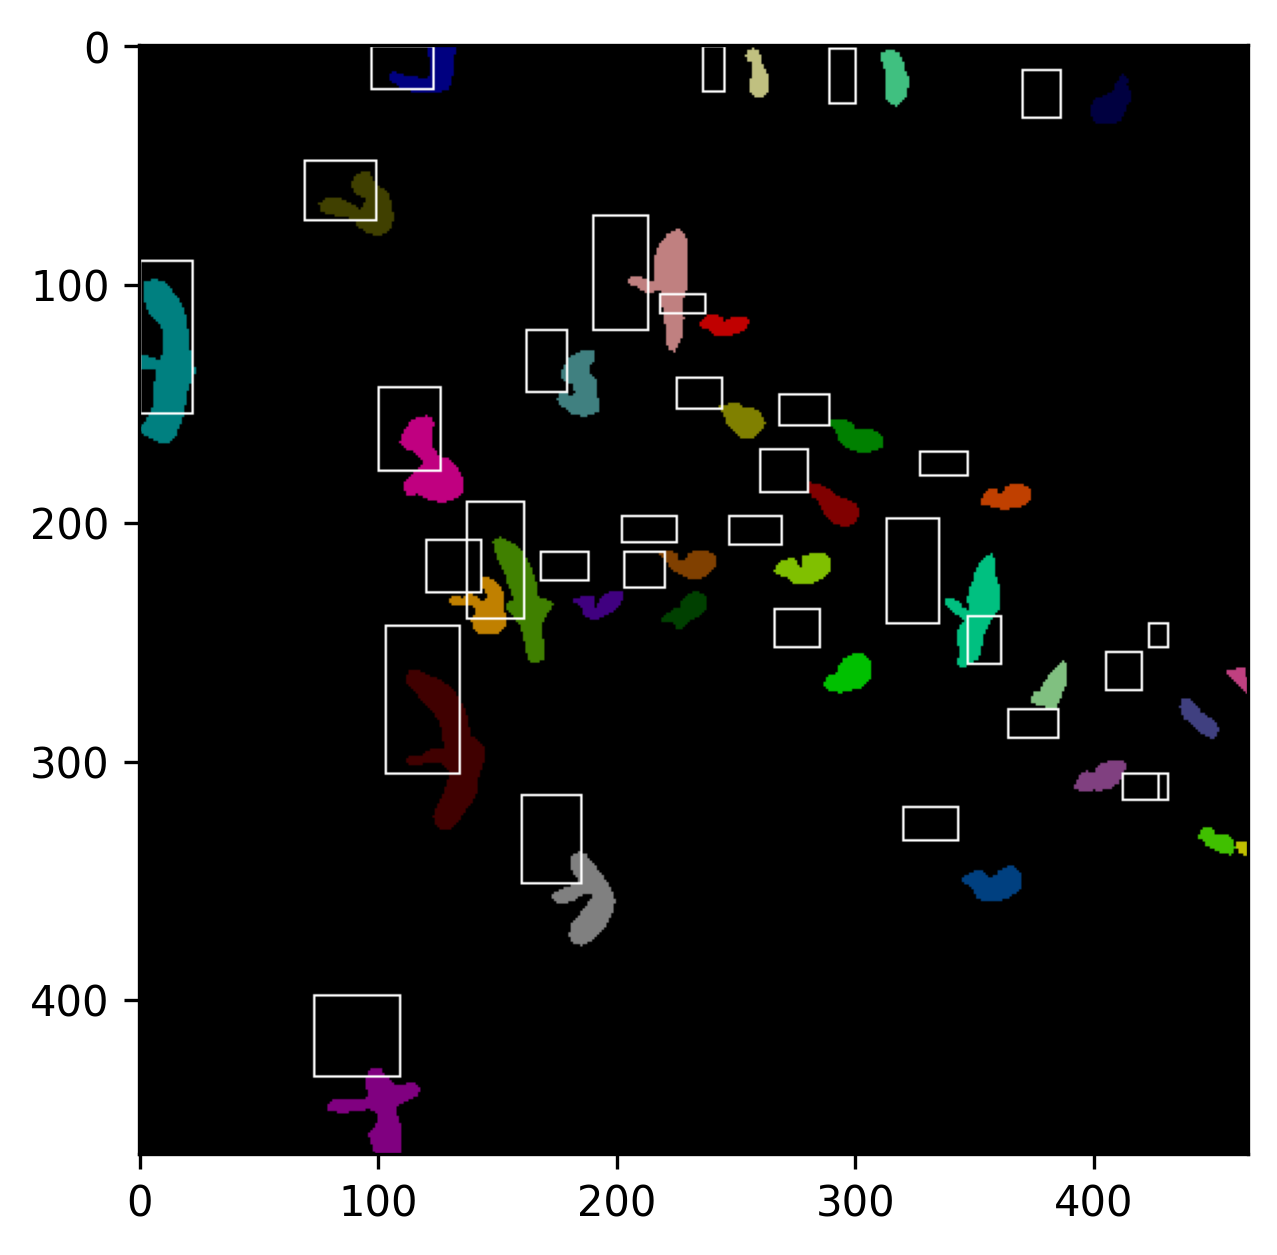

In [31]:
image = Image.open('/Users/thang/Documents/Thang/segmentation_masks/SegmentationObject/594341.png')
plot_bounding_box(image, bbox)